In [1]:
import numpy as np
import pandas as pd
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from plotly.offline import plot, iplot, init_notebook_mode

warnings.filterwarnings("ignore")


## y hadook score limite -129. if menor(-130) = 1 else 0

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
# Read the data
data = pd.read_csv('/home/andre/Documents/FACULDADE/2023-1/IA/TP_3/input/MammalTrainingData080221_NvAdded.csv')
data

,Species,ForStrat_terrestrial,ForStrat_aquatic,Activity.Nocturnal,Activity.Crepuscular,Activity.Diurnal,female_maturity_d,male_maturity_d,weaning_d,litters_or_clutches_per_y,longevity_y,adult_svl_cm,infantMortalityRate_per_year,mortalityRateDoublingTime_y,metabolicRate_W,temperature_K,diet_breadth,development_d,mass_specific_production,log_litterclutch_size_n,log_inter_litterbirth_interval_y,log_birthhatching_weight_g,log_weaning_weight_g,log_adult_body_mass_g,log_female_body_mass_g,log_male_body_mass_g,tnc_ecoregion_breadth,log_range_size,X2.1_AgeatEyeOpening_d,X9.1_GestationLen_d,X10.2_SocialGrpSize,X24.1_TeatNumber,X6.2_TrophicLevel,X13.3_WeaningHeadBodyLen_mm,X26.2_GR_MaxLat_dd,X26.3_GR_MinLat_dd,X26.4_GR_MidRangeLat_dd,X26.5_GR_MaxLong_dd,X26.6_GR_MinLong_dd,X26.7_GR_MidRangeLong_dd,X27.4_HuPopDen_Change,X28.1_Precip_Mean_mm,X28.2_Temp_Mean_01degC,X30.1_AET_Mean_mm,X30.2_PET_Mean_mm,log_DispersalAge_d,log_HomeRange_km2,log_HomeRange_Indiv_km2,log_PopulationDensity_n.km2,log_PopulationGrpSize,log_HuPopDen_Min_n.km2,log_HuPopDen_Mean_n.km2,log_HuPopDen_5p_n.km2,log_NeonateHeadBodyLen_mm,log_WOS_hits,Afrosoricida,Artiodactyla,Carnivora,Cetacea,Chiroptera,Cingulata,Dasyuromorphia,Didelphimorphia,Diprotodontia,Erinaceomorpha,Lagomorpha,Macroscelidea,Monotremata,Perissodactyla,Pholidota,Primates,Proboscidea,Rodentia,Sirenia,Soricomorpha,Tubulidentata,nchar,haddock_score_mean,haddock_score_sd,AA_83_Y,AA_30_negative
0,Neovison vison,1.0,0.0,1.0,1.0,0.0,297.722620,371.000000,49.000000,1.000000,10.695833,43.000000,NaN,NaN,2.722,312.15,0.4,36.220620,0.045709,1.560248,-0.000685,2.156403,4.700480,6.802117,7.013985,7.444249,27.000000,16.494735,NaN,36.705987,NaN,NaN,NaN,NaN,71.390000,24.940000,48.160000,-55.610000,-168.120000,-111.870000,0.030000,55.370000,14.910000,458.260000,529.250000,NaN,-2.866854,-2.754329,4.085635,NaN,1.056682,3.006178,0.025741,3.803203,7.557473,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,805,-144.814760,1.580668,1,1
1,Acinonyx jubatus,1.0,0.0,0.0,0.0,1.0,598.985000,456.000000,107.000000,0.700000,19.000000,149.021500,NaN,NaN,61.770,312.15,0.1,89.060000,0.019578,1.111858,0.395145,6.142747,7.570443,10.831270,9.846167,10.988802,0.309524,15.448508,9.03,92.240000,NaN,12.0,3.0,NaN,37.720000,-29.220000,4.240000,60.820000,-14.910000,22.950000,0.110000,51.260000,230.830000,595.060000,1499.040000,6.142037,4.480400,4.547329,-4.605170,NaN,0.907587,2.989714,-0.067474,5.521461,6.694562,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,805,-127.078110,1.747960,1,1
2,Aotus nancymaae,1.0,0.0,1.0,0.0,0.0,683.548198,627.229743,199.718698,1.373433,11.391667,37.000000,NaN,NaN,NaN,NaN,0.6,127.745221,0.153402,0.019803,-0.116040,4.275836,6.129428,6.673336,7.444762,6.720834,0.083333,13.107712,NaN,108.672743,4.0,NaN,2.0,NaN,-2.720000,-6.470000,-4.590000,-66.610000,-75.950000,-71.280000,0.050000,228.040000,261.240000,1531.250000,1533.130000,NaN,-2.939557,-2.663378,3.337903,NaN,1.669032,0.122218,0.455452,4.046583,4.700481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,805,-140.619180,2.629311,1,1
3,Balaenoptera acutorostrata,0.0,1.0,0.0,0.0,1.0,2740.000000,2740.000000,167.340000,1.000000,48.500000,786.465500,NaN,NaN,NaN,NaN,0.2,309.306350,0.042667,0.000000,0.252002,12.676076,14.492895,15.830414,10.918308,14.592295,0.559524,18.728611,NaN,304.160000,2.0,NaN,3.0,NaN,11.659394,0.560051,6.201413,35.846219,14.805832,25.230358,NaN,148.434830,177.854437,894.442357,1307.267867,NaN,2.442211,-2.458595,-1.034633,0.0,1.632281,1.625241,0.654467,8.935902,6.159096,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,804,-117.739420,2.003812,1,0
4,Bos mutus,NaN,NaN,NaN,NaN,NaN,494.972661,702.981099,90.199617,1.068823,11.245579,38.234507,NaN,NaN,NaN,NaN,NaN,120.038185,0.407257,0.526610,-0.172863,2.924968,5.166991,NaN,5.248068,6.018212,0.047619,13.059399,NaN,108.754439,NaN,NaN,NaN,NaN,13.695438,-0.794176,6.201413,35.846219,14.805832,25.230358,NaN,149.293170,181.553030,875.991850,1326.443988,NaN,-1.319838,-2.781916,5.082738,NaN,1.847101,1.977512,0.721810,3.975580,3.663564,0,1,0,0,0,0,0,

In [4]:
# binarize hadook score column if the score is less than -129 then 1 else 0
# 1 suceptivel a doença
data['HADOOK_SCORE_BINARIZADO'] = np.where(data['haddock_score_mean'] < -129, 1, 0)
data

,Species,ForStrat_terrestrial,ForStrat_aquatic,Activity.Nocturnal,Activity.Crepuscular,Activity.Diurnal,female_maturity_d,male_maturity_d,weaning_d,litters_or_clutches_per_y,longevity_y,adult_svl_cm,infantMortalityRate_per_year,mortalityRateDoublingTime_y,metabolicRate_W,temperature_K,diet_breadth,development_d,mass_specific_production,log_litterclutch_size_n,log_inter_litterbirth_interval_y,log_birthhatching_weight_g,log_weaning_weight_g,log_adult_body_mass_g,log_female_body_mass_g,log_male_body_mass_g,tnc_ecoregion_breadth,log_range_size,X2.1_AgeatEyeOpening_d,X9.1_GestationLen_d,X10.2_SocialGrpSize,X24.1_TeatNumber,X6.2_TrophicLevel,X13.3_WeaningHeadBodyLen_mm,X26.2_GR_MaxLat_dd,X26.3_GR_MinLat_dd,X26.4_GR_MidRangeLat_dd,X26.5_GR_MaxLong_dd,X26.6_GR_MinLong_dd,X26.7_GR_MidRangeLong_dd,X27.4_HuPopDen_Change,X28.1_Precip_Mean_mm,X28.2_Temp_Mean_01degC,X30.1_AET_Mean_mm,X30.2_PET_Mean_mm,log_DispersalAge_d,log_HomeRange_km2,log_HomeRange_Indiv_km2,log_PopulationDensity_n.km2,log_PopulationGrpSize,log_HuPopDen_Min_n.km2,log_HuPopDen_Mean_n.km2,log_HuPopDen_5p_n.km2,log_NeonateHeadBodyLen_mm,log_WOS_hits,Afrosoricida,Artiodactyla,Carnivora,Cetacea,Chiroptera,Cingulata,Dasyuromorphia,Didelphimorphia,Diprotodontia,Erinaceomorpha,Lagomorpha,Macroscelidea,Monotremata,Perissodactyla,Pholidota,Primates,Proboscidea,Rodentia,Sirenia,Soricomorpha,Tubulidentata,nchar,haddock_score_mean,haddock_score_sd,AA_83_Y,AA_30_negative,HADOOK_SCORE_BINARIZADO
0,Neovison vison,1.0,0.0,1.0,1.0,0.0,297.722620,371.000000,49.000000,1.000000,10.695833,43.000000,NaN,NaN,2.722,312.15,0.4,36.220620,0.045709,1.560248,-0.000685,2.156403,4.700480,6.802117,7.013985,7.444249,27.000000,16.494735,NaN,36.705987,NaN,NaN,NaN,NaN,71.390000,24.940000,48.160000,-55.610000,-168.120000,-111.870000,0.030000,55.370000,14.910000,458.260000,529.250000,NaN,-2.866854,-2.754329,4.085635,NaN,1.056682,3.006178,0.025741,3.803203,7.557473,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,805,-144.814760,1.580668,1,1,1
1,Acinonyx jubatus,1.0,0.0,0.0,0.0,1.0,598.985000,456.000000,107.000000,0.700000,19.000000,149.021500,NaN,NaN,61.770,312.15,0.1,89.060000,0.019578,1.111858,0.395145,6.142747,7.570443,10.831270,9.846167,10.988802,0.309524,15.448508,9.03,92.240000,NaN,12.0,3.0,NaN,37.720000,-29.220000,4.240000,60.820000,-14.910000,22.950000,0.110000,51.260000,230.830000,595.060000,1499.040000,6.142037,4.480400,4.547329,-4.605170,NaN,0.907587,2.989714,-0.067474,5.521461,6.694562,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,805,-127.078110,1.747960,1,1,0
2,Aotus nancymaae,1.0,0.0,1.0,0.0,0.0,683.548198,627.229743,199.718698,1.373433,11.391667,37.000000,NaN,NaN,NaN,NaN,0.6,127.745221,0.153402,0.019803,-0.116040,4.275836,6.129428,6.673336,7.444762,6.720834,0.083333,13.107712,NaN,108.672743,4.0,NaN,2.0,NaN,-2.720000,-6.470000,-4.590000,-66.610000,-75.950000,-71.280000,0.050000,228.040000,261.240000,1531.250000,1533.130000,NaN,-2.939557,-2.663378,3.337903,NaN,1.669032,0.122218,0.455452,4.046583,4.700481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,805,-140.619180,2.629311,1,1,1
3,Balaenoptera acutorostrata,0.0,1.0,0.0,0.0,1.0,2740.000000,2740.000000,167.340000,1.000000,48.500000,786.465500,NaN,NaN,NaN,NaN,0.2,309.306350,0.042667,0.000000,0.252002,12.676076,14.492895,15.830414,10.918308,14.592295,0.559524,18.728611,NaN,304.160000,2.0,NaN,3.0,NaN,11.659394,0.560051,6.201413,35.846219,14.805832,25.230358,NaN,148.434830,177.854437,894.442357,1307.267867,NaN,2.442211,-2.458595,-1.034633,0.0,1.632281,1.625241,0.654467,8.935902,6.159096,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,804,-117.739420,2.003812,1,0,0
4,Bos mutus,NaN,NaN,NaN,NaN,NaN,494.972661,702.981099,90.199617,1.068823,11.245579,38.234507,NaN,NaN,NaN,NaN,NaN,120.038185,0.407257,0.526610,-0.172863,2.924968,5.166991,NaN,5.248068,6.018212,0.047619,13.059399,NaN,108.754439,NaN,NaN,NaN,NaN,13.695438,-0.794176,6.201413,35.846219,14.805832,25.230358,NaN,149.293170,181.553030,875.991850,1326.443988,NaN,-1.319838,-2.781916,5.082738,NaN,1.847101,1.977512,0.721810,

# base ja balanceada com aproximadamente 50% de cada classe, 58 e 55

In [5]:
# count the number of 1 and 0 in the column HADOOK_SCORE_BINARIZADO
data['HADOOK_SCORE_BINARIZADO'].value_counts()

HADOOK_SCORE_BINARIZADO
1    58
0    55
Name: count, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 82 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Species                           113 non-null    object 
 1   ForStrat_terrestrial              109 non-null    float64
 2   ForStrat_aquatic                  109 non-null    float64
 3   Activity.Nocturnal                109 non-null    float64
 4   Activity.Crepuscular              109 non-null    float64
 5   Activity.Diurnal                  109 non-null    float64
 6   female_maturity_d                 113 non-null    float64
 7   male_maturity_d                   113 non-null    float64
 8   weaning_d                         113 non-null    float64
 9   litters_or_clutches_per_y         113 non-null    float64
 10  longevity_y                       113 non-null    float64
 11  adult_svl_cm                      113 non-null    float64
 12  infantMo

In [7]:
data.isnull().sum()

Species                    0
ForStrat_terrestrial       4
ForStrat_aquatic           4
Activity.Nocturnal         4
Activity.Crepuscular       4
                          ..
haddock_score_mean         0
haddock_score_sd           0
AA_83_Y                    0
AA_30_negative             0
HADOOK_SCORE_BINARIZADO    0
Length: 82, dtype: int64

In [8]:
# drop species column
data = data.drop(['Species'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ForStrat_terrestrial              109 non-null    float64
 1   ForStrat_aquatic                  109 non-null    float64
 2   Activity.Nocturnal                109 non-null    float64
 3   Activity.Crepuscular              109 non-null    float64
 4   Activity.Diurnal                  109 non-null    float64
 5   female_maturity_d                 113 non-null    float64
 6   male_maturity_d                   113 non-null    float64
 7   weaning_d                         113 non-null    float64
 8   litters_or_clutches_per_y         113 non-null    float64
 9   longevity_y                       113 non-null    float64
 10  adult_svl_cm                      113 non-null    float64
 11  infantMortalityRate_per_year      6 non-null      float64
 12  mortalit

# drop columns with more than 50% of missing values


In [10]:
data = data.drop(['haddock_score_mean','infantMortalityRate_per_year','mortalityRateDoublingTime_y'], axis=1)

In [11]:
# fill missing values with k-NN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data = pd.DataFrame(imputer.fit_transform(data),columns = data.columns)
data


,ForStrat_terrestrial,ForStrat_aquatic,Activity.Nocturnal,Activity.Crepuscular,Activity.Diurnal,female_maturity_d,male_maturity_d,weaning_d,litters_or_clutches_per_y,longevity_y,adult_svl_cm,metabolicRate_W,temperature_K,diet_breadth,development_d,mass_specific_production,log_litterclutch_size_n,log_inter_litterbirth_interval_y,log_birthhatching_weight_g,log_weaning_weight_g,log_adult_body_mass_g,log_female_body_mass_g,log_male_body_mass_g,tnc_ecoregion_breadth,log_range_size,X2.1_AgeatEyeOpening_d,X9.1_GestationLen_d,X10.2_SocialGrpSize,X24.1_TeatNumber,X6.2_TrophicLevel,X13.3_WeaningHeadBodyLen_mm,X26.2_GR_MaxLat_dd,X26.3_GR_MinLat_dd,X26.4_GR_MidRangeLat_dd,X26.5_GR_MaxLong_dd,X26.6_GR_MinLong_dd,X26.7_GR_MidRangeLong_dd,X27.4_HuPopDen_Change,X28.1_Precip_Mean_mm,X28.2_Temp_Mean_01degC,X30.1_AET_Mean_mm,X30.2_PET_Mean_mm,log_DispersalAge_d,log_HomeRange_km2,log_HomeRange_Indiv_km2,log_PopulationDensity_n.km2,log_PopulationGrpSize,log_HuPopDen_Min_n.km2,log_HuPopDen_Mean_n.km2,log_HuPopDen_5p_n.km2,log_NeonateHeadBodyLen_mm,log_WOS_hits,Afrosoricida,Artiodactyla,Carnivora,Cetacea,Chiroptera,Cingulata,Dasyuromorphia,Didelphimorphia,Diprotodontia,Erinaceomorpha,Lagomorpha,Macroscelidea,Monotremata,Perissodactyla,Pholidota,Primates,Proboscidea,Rodentia,Sirenia,Soricomorpha,Tubulidentata,nchar,haddock_score_sd,AA_83_Y,AA_30_negative,HADOOK_SCORE_BINARIZADO
0,1.0,0.0,1.0,1.0,0.0,297.722620,371.000000,49.000000,1.000000,10.695833,43.000000,2.72200,312.15,0.4,36.220620,0.045709,1.560248,-0.000685,2.156403,4.700480,6.802117,7.013985,7.444249,27.000000,16.494735,15.218,36.705987,1.80,8.2,2.4,1949.7475,71.390000,24.940000,48.160000,-55.610000,-168.120000,-111.870000,0.030000,55.370000,14.910000,458.260000,529.250000,5.017928,-2.866854,-2.754329,4.085635,0.492941,1.056682,3.006178,0.025741,3.803203,7.557473,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,805.0,1.580668,1.0,1.0,1.0
1,1.0,0.0,0.0,0.0,1.0,598.985000,456.000000,107.000000,0.700000,19.000000,149.021500,61.77000,312.15,0.1,89.060000,0.019578,1.111858,0.395145,6.142747,7.570443,10.831270,9.846167,10.988802,0.309524,15.448508,9.030,92.240000,2.51,12.0,3.0,1949.7475,37.720000,-29.220000,4.240000,60.820000,-14.910000,22.950000,0.110000,51.260000,230.830000,595.060000,1499.040000,6.142037,4.480400,4.547329,-4.605170,3.774987,0.907587,2.989714,-0.067474,5.521461,6.694562,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,805.0,1.747960,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,683.548198,627.229743,199.718698,1.373433,11.391667,37.000000,2.09000,308.55,0.6,127.745221,0.153402,0.019803,-0.116040,4.275836,6.129428,6.673336,7.444762,6.720834,0.083333,13.107712,3.506,108.672743,4.00,3.6,2.0,1949.7475,-2.720000,-6.470000,-4.590000,-66.610000,-75.950000,-71.280000,0.050000,228.040000,261.240000,1531.250000,1533.130000,6.119985,-2.939557,-2.663378,3.337903,4.889037,1.669032,0.122218,0.455452,4.046583,4.700481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,805.0,2.629311,1.0,1.0,1.0
3,0.0,1.0,0.0,0.0,1.0,2740.000000,2740.000000,167.340000,1.000000,48.500000,786.465500,71.48272,309.53,0.2,309.306350,0.042667,0.000000,0.252002,12.676076,14.492895,15.830414,10.918308,14.592295,0.559524,18.728611,6.824,304.160000,2.00,2.4,3.0,1949.7475,11.659394,0.560051,6.201413,35.846219,14.805832,25.230358,0.094000,148.434830,177.854437,894.442357,1307.267867,6.643028,2.442211,-2.458595,-1.034633,0.000000,1.632281,1.625241,0.654467,8.935902,6.159096,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,804.0,2.003812,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,494.972661,702.981099,90.199617,1.068823,11.245579,38.234507,8.33300,308.21,0.1,120.038185,0.407257,0.526610,-0.172863,2.924968,5.166991,2.410045,5.248068,6.018212,0.047619,13.059399,5.418,108.754439,2.51,5.6,3.0,1949.7475,13.695438,-0.794176,6.201413,35.846219,14.805832,25.230358,0.092000,149.293170,181.553030,875.991850,1326.443988,

In [ ]:
# # Univariate Selection K Best
#
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
#
#
# array = data.values
# X = array[:,0:79]
# Y = array[:]
# test = SelectKBest(score_func=f_classif, k=6)
# fit = test.fit(X, Y)
#
# print(data.columns[fit.get_support(indices=True)])

# Modelos

In [12]:
y = data['HADOOK_SCORE_BINARIZADO']
x = data.drop(['HADOOK_SCORE_BINARIZADO'], axis=1)

In [14]:
x

,ForStrat_terrestrial,ForStrat_aquatic,Activity.Nocturnal,Activity.Crepuscular,Activity.Diurnal,female_maturity_d,male_maturity_d,weaning_d,litters_or_clutches_per_y,longevity_y,adult_svl_cm,metabolicRate_W,temperature_K,diet_breadth,development_d,mass_specific_production,log_litterclutch_size_n,log_inter_litterbirth_interval_y,log_birthhatching_weight_g,log_weaning_weight_g,log_adult_body_mass_g,log_female_body_mass_g,log_male_body_mass_g,tnc_ecoregion_breadth,log_range_size,X2.1_AgeatEyeOpening_d,X9.1_GestationLen_d,X10.2_SocialGrpSize,X24.1_TeatNumber,X6.2_TrophicLevel,X13.3_WeaningHeadBodyLen_mm,X26.2_GR_MaxLat_dd,X26.3_GR_MinLat_dd,X26.4_GR_MidRangeLat_dd,X26.5_GR_MaxLong_dd,X26.6_GR_MinLong_dd,X26.7_GR_MidRangeLong_dd,X27.4_HuPopDen_Change,X28.1_Precip_Mean_mm,X28.2_Temp_Mean_01degC,X30.1_AET_Mean_mm,X30.2_PET_Mean_mm,log_DispersalAge_d,log_HomeRange_km2,log_HomeRange_Indiv_km2,log_PopulationDensity_n.km2,log_PopulationGrpSize,log_HuPopDen_Min_n.km2,log_HuPopDen_Mean_n.km2,log_HuPopDen_5p_n.km2,log_NeonateHeadBodyLen_mm,log_WOS_hits,Afrosoricida,Artiodactyla,Carnivora,Cetacea,Chiroptera,Cingulata,Dasyuromorphia,Didelphimorphia,Diprotodontia,Erinaceomorpha,Lagomorpha,Macroscelidea,Monotremata,Perissodactyla,Pholidota,Primates,Proboscidea,Rodentia,Sirenia,Soricomorpha,Tubulidentata,nchar,haddock_score_sd,AA_83_Y,AA_30_negative
0,1.0,0.0,1.0,1.0,0.0,297.722620,371.000000,49.000000,1.000000,10.695833,43.000000,2.72200,312.15,0.4,36.220620,0.045709,1.560248,-0.000685,2.156403,4.700480,6.802117,7.013985,7.444249,27.000000,16.494735,15.218,36.705987,1.80,8.2,2.4,1949.7475,71.390000,24.940000,48.160000,-55.610000,-168.120000,-111.870000,0.030000,55.370000,14.910000,458.260000,529.250000,5.017928,-2.866854,-2.754329,4.085635,0.492941,1.056682,3.006178,0.025741,3.803203,7.557473,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,805.0,1.580668,1.0,1.0
1,1.0,0.0,0.0,0.0,1.0,598.985000,456.000000,107.000000,0.700000,19.000000,149.021500,61.77000,312.15,0.1,89.060000,0.019578,1.111858,0.395145,6.142747,7.570443,10.831270,9.846167,10.988802,0.309524,15.448508,9.030,92.240000,2.51,12.0,3.0,1949.7475,37.720000,-29.220000,4.240000,60.820000,-14.910000,22.950000,0.110000,51.260000,230.830000,595.060000,1499.040000,6.142037,4.480400,4.547329,-4.605170,3.774987,0.907587,2.989714,-0.067474,5.521461,6.694562,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,805.0,1.747960,1.0,1.0
2,1.0,0.0,1.0,0.0,0.0,683.548198,627.229743,199.718698,1.373433,11.391667,37.000000,2.09000,308.55,0.6,127.745221,0.153402,0.019803,-0.116040,4.275836,6.129428,6.673336,7.444762,6.720834,0.083333,13.107712,3.506,108.672743,4.00,3.6,2.0,1949.7475,-2.720000,-6.470000,-4.590000,-66.610000,-75.950000,-71.280000,0.050000,228.040000,261.240000,1531.250000,1533.130000,6.119985,-2.939557,-2.663378,3.337903,4.889037,1.669032,0.122218,0.455452,4.046583,4.700481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,805.0,2.629311,1.0,1.0
3,0.0,1.0,0.0,0.0,1.0,2740.000000,2740.000000,167.340000,1.000000,48.500000,786.465500,71.48272,309.53,0.2,309.306350,0.042667,0.000000,0.252002,12.676076,14.492895,15.830414,10.918308,14.592295,0.559524,18.728611,6.824,304.160000,2.00,2.4,3.0,1949.7475,11.659394,0.560051,6.201413,35.846219,14.805832,25.230358,0.094000,148.434830,177.854437,894.442357,1307.267867,6.643028,2.442211,-2.458595,-1.034633,0.000000,1.632281,1.625241,0.654467,8.935902,6.159096,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,804.0,2.003812,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,494.972661,702.981099,90.199617,1.068823,11.245579,38.234507,8.33300,308.21,0.1,120.038185,0.407257,0.526610,-0.172863,2.924968,5.166991,2.410045,5.248068,6.018212,0.047619,13.059399,5.418,108.754439,2.51,5.6,3.0,1949.7475,13.695438,-0.794176,6.201413,35.846219,14.805832,25.230358,0.092000,149.293170,181.553030,875.991850,1326.443988,6.231273,-1.319838,-2.781916,5.082738,3.

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.25, random_state=42)


In [16]:

from sklearn.model_selection import KFold, StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)


In [17]:
import copy
from sklearn.metrics import precision_recall_fscore_support
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, StratifiedKFold

def perform_cross_validation(model, x, y, num_folds=5):


    kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=2)
    melhor = 0
    fold = 1
    labels = ['Sobreviveu', 'Morreu']
    labels2 = [0, 1]

    precision_valid = [0, 0]
    recall_valid = [0, 0]
    fscore_valid = [0, 0]

    best_model = None

    array_precision = []

    for train_index, valid_index in kf.split(x, y):
        x_train, x_valid = x.iloc[train_index], x.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

        model.fit(x_train, y_train)
        previsoes = model.predict(x_valid)

        # Calculating metrics
        precision, recall, fscore, support = precision_recall_fscore_support(y_valid, previsoes, average=None)

        precision_valid = np.add(precision_valid, precision)
        recall_valid = np.add(recall_valid, recall)
        fscore_valid = np.add(fscore_valid, fscore)

        accuracy = np.mean(y_valid == previsoes)

        if accuracy > melhor:
            melhor = accuracy
            best_model = copy.deepcopy(model)

        array_precision.append(accuracy)

        print('FOLD:', fold)
        print(metrics.classification_report(y_valid, previsoes, target_names=labels))

        cm = metrics.confusion_matrix(y_valid, previsoes, labels=labels2)
        disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels2)
        disp.plot()
        plt.show()

        fold += 1
        print('---------------------------------------------------------')

    print("Precisão média na validação das classes Inferior e Superior:", np.round(precision_valid/num_folds, 2))
    print("----------------------------------------------------------------")
    print("Recall médio na validação das classes Inferior e Superior:", np.round(recall_valid/num_folds, 2))
    print("----------------------------------------------------------------")
    print("F1 score médio na validação das classes Inferior e Superior:", np.round(fscore_valid/num_folds, 2))
    print("----------------------------------------------------------------")

    return best_model, array_precision


## Naive Bayes

FOLD: 1
              precision    recall  f1-score   support

  Sobreviveu       1.00      0.89      0.94         9
      Morreu       0.89      1.00      0.94         8

    accuracy                           0.94        17
   macro avg       0.94      0.94      0.94        17
weighted avg       0.95      0.94      0.94        17



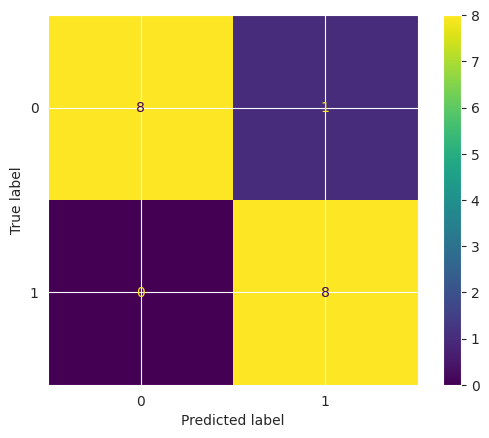

---------------------------------------------------------
FOLD: 2
              precision    recall  f1-score   support

  Sobreviveu       0.75      0.38      0.50         8
      Morreu       0.62      0.89      0.73         9

    accuracy                           0.65        17
   macro avg       0.68      0.63      0.61        17
weighted avg       0.68      0.65      0.62        17



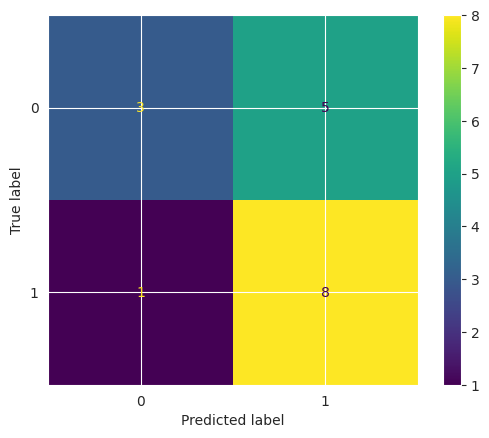

---------------------------------------------------------
FOLD: 3
              precision    recall  f1-score   support

  Sobreviveu       0.83      0.62      0.71         8
      Morreu       0.73      0.89      0.80         9

    accuracy                           0.76        17
   macro avg       0.78      0.76      0.76        17
weighted avg       0.78      0.76      0.76        17



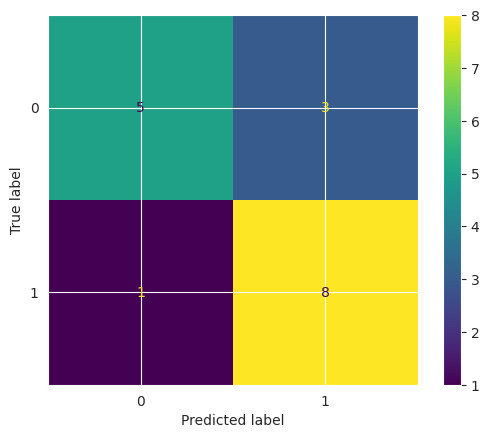

---------------------------------------------------------
FOLD: 4
              precision    recall  f1-score   support

  Sobreviveu       0.60      0.75      0.67         8
      Morreu       0.71      0.56      0.63         9

    accuracy                           0.65        17
   macro avg       0.66      0.65      0.65        17
weighted avg       0.66      0.65      0.64        17



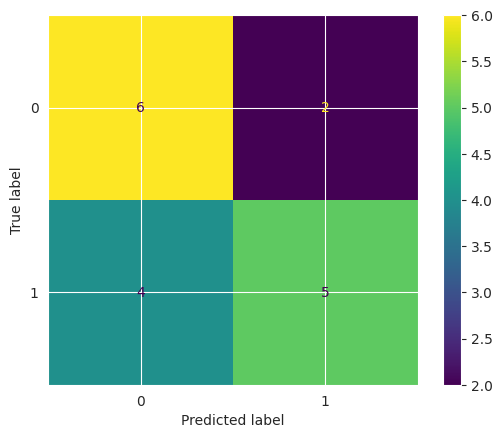

---------------------------------------------------------
FOLD: 5
              precision    recall  f1-score   support

  Sobreviveu       0.83      0.62      0.71         8
      Morreu       0.70      0.88      0.78         8

    accuracy                           0.75        16
   macro avg       0.77      0.75      0.75        16
weighted avg       0.77      0.75      0.75        16



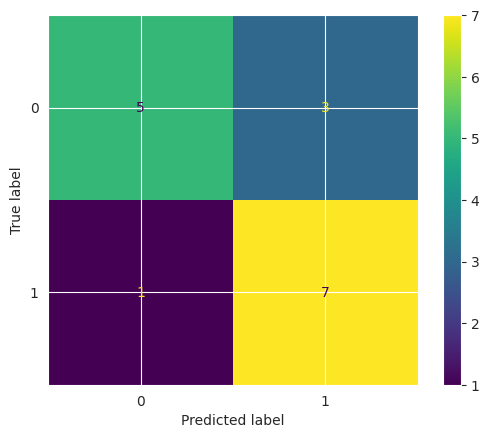

---------------------------------------------------------
Precisão média na validação das classes Inferior e Superior: [0.8  0.73]
----------------------------------------------------------------
Recall médio na validação das classes Inferior e Superior: [0.65 0.84]
----------------------------------------------------------------
F1 score médio na validação das classes Inferior e Superior: [0.71 0.77]
----------------------------------------------------------------


In [18]:
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()
naive, naive_array_precision = perform_cross_validation(naive, x_train, y_train)

In [19]:

print(classification_report(y_test, naive.predict(x_test)))

# acurracy
naive_accuracy = accuracy_score(y_test, naive.predict(x_test))*100

print('Acurracy: ', naive_accuracy)

              precision    recall  f1-score   support

         0.0       0.73      0.57      0.64        14
         1.0       0.67      0.80      0.73        15

    accuracy                           0.69        29
   macro avg       0.70      0.69      0.68        29
weighted avg       0.70      0.69      0.69        29

Acurracy:  68.96551724137932


## RandomForest

In [20]:
## RandomForest

In [21]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [1, 2, 4, 6, 8, 10, 20, 50, 100, 150],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params,
    cv=2,
    n_jobs=5,
    verbose=1,
)
grid_search_rf.fit(x_train, y_train)
params_rf = grid_search_rf.best_params_
print(params_rf)


Fitting 2 folds for each of 140 candidates, totalling 280 fits
{'criterion': 'gini', 'max_features': 0.2, 'n_estimators': 150}


FOLD: 1
              precision    recall  f1-score   support

  Sobreviveu       0.82      1.00      0.90         9
      Morreu       1.00      0.75      0.86         8

    accuracy                           0.88        17
   macro avg       0.91      0.88      0.88        17
weighted avg       0.90      0.88      0.88        17



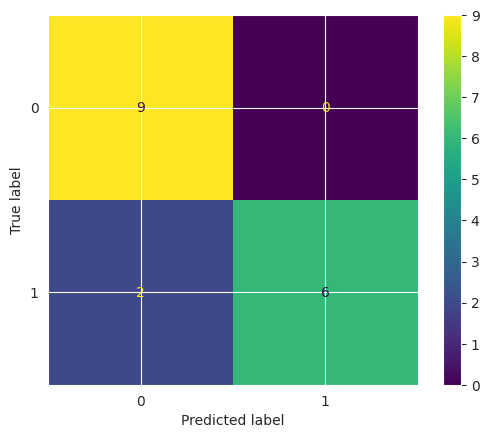

---------------------------------------------------------
FOLD: 2
              precision    recall  f1-score   support

  Sobreviveu       1.00      0.75      0.86         8
      Morreu       0.82      1.00      0.90         9

    accuracy                           0.88        17
   macro avg       0.91      0.88      0.88        17
weighted avg       0.90      0.88      0.88        17



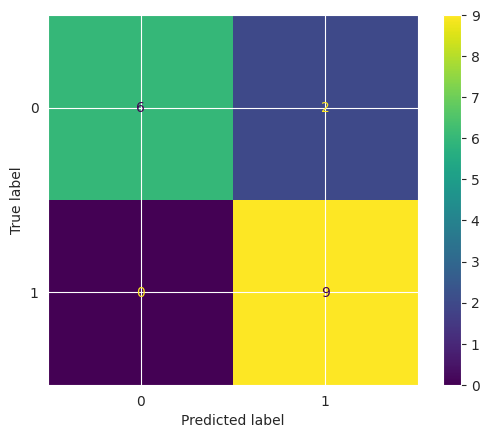

---------------------------------------------------------
FOLD: 3
              precision    recall  f1-score   support

  Sobreviveu       1.00      0.88      0.93         8
      Morreu       0.90      1.00      0.95         9

    accuracy                           0.94        17
   macro avg       0.95      0.94      0.94        17
weighted avg       0.95      0.94      0.94        17



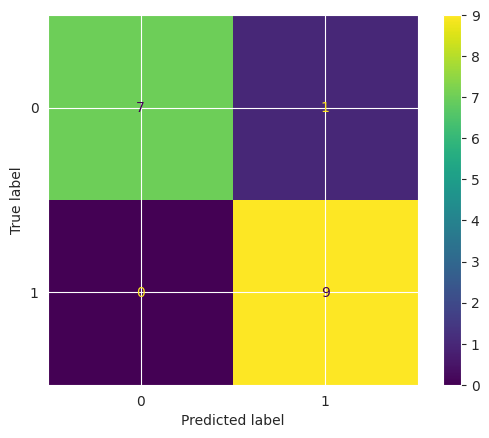

---------------------------------------------------------
FOLD: 4
              precision    recall  f1-score   support

  Sobreviveu       0.73      1.00      0.84         8
      Morreu       1.00      0.67      0.80         9

    accuracy                           0.82        17
   macro avg       0.86      0.83      0.82        17
weighted avg       0.87      0.82      0.82        17



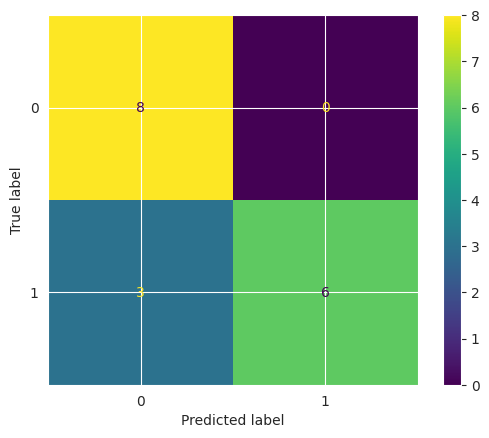

---------------------------------------------------------
FOLD: 5
              precision    recall  f1-score   support

  Sobreviveu       0.83      0.62      0.71         8
      Morreu       0.70      0.88      0.78         8

    accuracy                           0.75        16
   macro avg       0.77      0.75      0.75        16
weighted avg       0.77      0.75      0.75        16



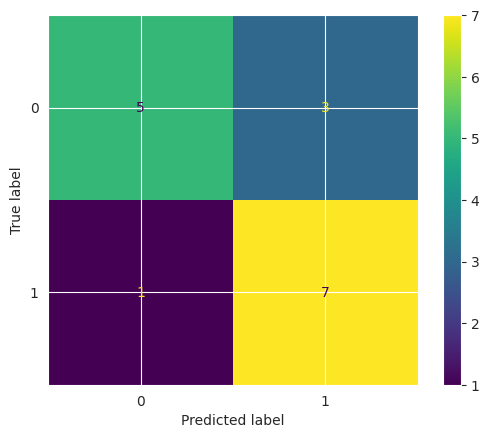

---------------------------------------------------------
Precisão média na validação das classes Inferior e Superior: [0.88 0.88]
----------------------------------------------------------------
Recall médio na validação das classes Inferior e Superior: [0.85 0.86]
----------------------------------------------------------------
F1 score médio na validação das classes Inferior e Superior: [0.85 0.86]
----------------------------------------------------------------


In [22]:
# modelo Random Forest
random_forest = RandomForestClassifier(n_estimators= params_rf.get("n_estimators"), max_features= params_rf.get("max_features"), criterion= params_rf.get("criterion"), random_state = 0)


random_forest, random_forest_array_precision = perform_cross_validation(random_forest, x_train, y_train)

In [25]:
print(classification_report(y_test, random_forest.predict(x_test)))

# acurracy
random_forest_accuracy = accuracy_score(y_test, random_forest.predict(x_test))*100

print('Acurracy: ', random_forest_accuracy)

              precision    recall  f1-score   support

         0.0       0.56      0.64      0.60        14
         1.0       0.62      0.53      0.57        15

    accuracy                           0.59        29
   macro avg       0.59      0.59      0.59        29
weighted avg       0.59      0.59      0.59        29

Acurracy:  58.620689655172406


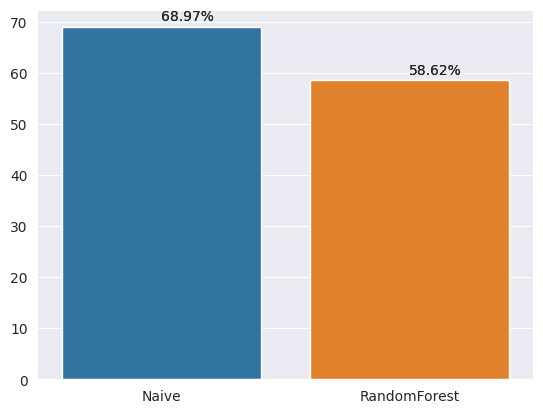

In [35]:
import seaborn as sns

model_list = ['Naive', 'RandomForest']
accuracy_list = [naive_accuracy, random_forest_accuracy]





plt.bar(model_list, accuracy_list)
ax = sns.barplot(x=model_list, y=accuracy_list)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    xf, yf = i.get_xy()
    ax.annotate(f'{round(height,2)}%', (xf + width/2, yf + height*1.02))
plt.show()
